<a href="https://colab.research.google.com/github/programmer1062/SentimentalAnalysisForNarendraModi/blob/master/SentimentMyProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#this this sentiment analysis 

In [ ]:
import tweepy 
from textblob import TextBlob
from wordcloud import WordCloud 
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
consumerkey='2vZlMRJQ4DA7e8o9hJwJxT4iO'
consumersecret='0EphCmY2yMtPxSmD2EG4aozzkdHFvNZH9AFy0nIHKq5buo5mrg'
accesstoken='717335454442369024-dGyW1Xo5uZyypfsXZyClGJ4cWn53stQ'
accesstokensecret='QETZNOftwgbFgXj05vbBNXmMxCI8tVtdhTtrkJrKoaqxa'

In [ ]:
auth=tweepy.OAuthHandler(consumerkey,consumersecret)
auth.set_access_token(accesstoken,accesstokensecret)
api=tweepy.API(auth,wait_on_rate_limit=True)

In [ ]:
# posts=api.user_timeline(screen_name='NarendraModi', count=100,lang='en',tweet_mode='extended')
searchTerms='NarendraModi'
noOfTweet=int(input('enter the number of tweet'))
posts=api.search(q=searchTerms,count=noOfTweet,lang='en')
print('show 5 recent tweet: \n')
i=1
for tweet in posts[0:5]:
  # print(str(i) + ') ' +tweet.full_text + '\n')
  print(str(i) + ') ' +tweet.text+ '\n')
  i+=1

enter the number of tweet500
show 5 recent tweet: 

1) RT @Rameswar_Teli: Prime Minister Addresses the virtual Global Vaccine Summit 2020  https://t.co/fagViGqoL3

2) RT @PrinceArihan: India needs to be prepared. The anarchists are planning trouble. Their in-roads in colleges will be utilised to the maxim…

3) What are you say about OFB Corporate..
1 yas 
2 No 
Comments fast 
@OFB_India @PMOIndia @DefProdnIndia @dgof_board… https://t.co/ER8A2bqzSZ

4) RT @Itsmearjun6: #623rd_GodKabir_PrakatDiwas

God On Earth

when Lord Kabir was 25 days in age while performing his divine play he told tha…

5) @socialepfo @PMOIndia @LabourMinistry @narendramodi Still waiting for response, didn't get any positive update,we n… https://t.co/tp6FIt5GTQ



In [ ]:
# df=pd.DataFrame([tweet.full_text for tweet in posts],columns=['Tweets'])
df=pd.DataFrame([tweet.text for tweet in posts],columns=['Tweets'])
df.head()

,Tweets
0,RT @Rameswar_Teli: Prime Minister Addresses th...
1,RT @PrinceArihan: India needs to be prepared. ...
2,What are you say about OFB Corporate..\n1 yas ...
3,RT @Itsmearjun6: #623rd_GodKabir_PrakatDiwas\n...
4,@socialepfo @PMOIndia @LabourMinistry @narendr...


In [ ]:
def cleanText(text):
  text=re.sub(r'@[A-Za-z0-9]+', '', text)
  text=re.sub(r'#','',text)
  text=re.sub(r'RT[\s]+','',text)
  text=re.sub(r'https?:\/\/\S+','',text)
  text=re.sub(r'[:_]','',text)

  return text

df['Tweets']=df['Tweets'].apply(cleanText)
df

,Tweets
0,Teli Prime Minister Addresses the virtual Glob...
1,India needs to be prepared. The anarchists ar...
2,What are you say about OFB Corporate..\n1 yas ...
3,623rdGodKabirPrakatDiwas\n\nGod On Earth\n\nw...
4,"Still waiting for response, didn't get any..."
...,...
95,"when lockdown imposed nature Filltered, ozone ..."
96,StopMergingofGuardsCadre\n\n\n\n\n\n \nGuards…
97,With Great Government policy India investing ...
98,Addressed GVS2020. This is a commendable effo...


In [ ]:
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity

df['Subjectivity']=df['Tweets'].apply(getSubjectivity)
df['Polarity']=df['Tweets'].apply(getPolarity)

df[0:10]

,Tweets,Subjectivity,Polarity
0,Teli Prime Minister Addresses the virtual Glob...,0.000000,0.000000
1,India needs to be prepared. The anarchists ar...,0.200000,-0.200000
2,What are you say about OFB Corporate..\n1 yas ...,0.300000,0.100000
3,623rdGodKabirPrakatDiwas\n\nGod On Earth\n\nw...,0.000000,0.000000
4,"Still waiting for response, didn't get any...",0.545455,0.227273
5,Amzath Ali and Thamim Shaikh were arrested fo...,0.000000,0.000000
6,Amzath Ali and Thamim Shaikh were arrested fo...,0.000000,0.000000
7,octothorpe …,0.000000,0.000000
8,StopMergingofGuardsCadre\n\n\n\n\n\n\n\nGuard...,0.000000,0.000000
9,623rdGodKabirPrakatDiwas \nWho is the father ...,1.000000,0.500000


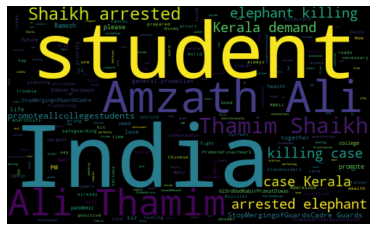

In [ ]:
allWords=' '.join([twts for twts in df['Tweets']])
wordCloud= WordCloud(width=500,height=300,random_state=21,max_font_size=119).generate(allWords)

plt.imshow(wordCloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
def getAnalysis(score):
  if score<0:
    return 'Negative'
  elif score==0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis']=df['Polarity'].apply(getAnalysis)

#show the data frame
df

,Tweets,Subjectivity,Polarity,Analysis
0,Teli Prime Minister Addresses the virtual Glob...,0.000000,0.000000,Neutral
1,India needs to be prepared. The anarchists ar...,0.200000,-0.200000,Negative
2,What are you say about OFB Corporate..\n1 yas ...,0.300000,0.100000,Positive
3,623rdGodKabirPrakatDiwas\n\nGod On Earth\n\nw...,0.000000,0.000000,Neutral
4,"Still waiting for response, didn't get any...",0.545455,0.227273,Positive
...,...,...,...,...
95,"when lockdown imposed nature Filltered, ozone ...",0.000000,0.000000,Neutral
96,StopMergingofGuardsCadre\n\n\n\n\n\n \nGuards…,0.000000,0.000000,Neutral
97,With Great Government policy India investing ...,0.750000,0.800000,Positive
98,Addressed GVS2020. This is a commendable effo...,0.500000,0.000000,Neutral


In [ ]:
#print all of the positive tweets
j=1
sortedDF=df.sort_values(by=['Polarity'])
for i in range(0,sortedDF.shape[0]):
  if sortedDF['Analysis'][i]=='Positive':
    print(str(j)+') '+sortedDF['Tweets'][i])
    print()
    j+=1

1) What are you say about OFB Corporate..
1 yas 
2 No 
Comments fast 
India   board… 

2)     Still waiting for response, didn't get any positive update,we n… 

3)  623rdGodKabirPrakatDiwas 
Who is the father of Bramha, who is mother of vishnu and who the grand father of shiva, al…

4)  Protecting and safeguarding the lives of elephants has always been a top priority for Indian Railways 🐘

Under PM …

5)     
sir, i kindly request to you general promotion to all… 

6)  The most shocking aspect of the Chinese intrusions is this Many Indians clearly love  more than they love the…

7)  You see, it's perfectly natural to respect and revere  ji and not to like  at all.

They are n…

8)    Sure

9)    1 jat   Good morning dost kaise ho

10) Cyborg I feel blessed to witness your new look pm  ji and that inspire me to make this Artwork.

Can we get 1000 Rt o…

11)  623rdGodKabirPrakatDiwas 
I am sure our Respected PM  and HM  might be curious to know the answers…

12) Hi l, awaiting the your p

In [ ]:
#print all of the negative tweets
j=1
sortedDF=df.sort_values(by=['Polarity'],ascending='False')
for i in range(0,sortedDF.shape[0]):
  if sortedDF['Analysis'][i]=='Negative':
    print(str(j)+') '+sortedDF['Tweets'][i])
    print()
    j+=1

1)  India needs to be prepared. The anarchists are planning trouble. Their in-roads in colleges will be utilised to the maxim…

2)  India needs to be prepared. The anarchists are planning trouble. Their in-roads in colleges will be utilised to the maxim…

3)     Hiranandani      Due to SC…

4)  Constitutionally and morally 100% accurate.

Unfortunately, administratively, we as nation never kept up.

A start has been…

5)  JUSTICE DELAYED PURPOSELY IS DENIED WANTEDLY WHICH RESULT IN DEADLY COVID19 INTENSIVELY.ARE YOU AWARE… 

6)   Don't talk like stupid liberals  .

7)  We are already in running category. The working condition of Goods Guard is very difficult and inhumane where no light, wat…

8)  GM all I pray Maha Kalabhairav to bless all Tweeples with health wealth and mental peace. I pray for  ji …

9)  . forced to restart HCQ trial after suspending it. Did Chinese interests pressure WHO to hurt Indian drug manufactu…

10)  Why India with world's largest population couldn't produce 

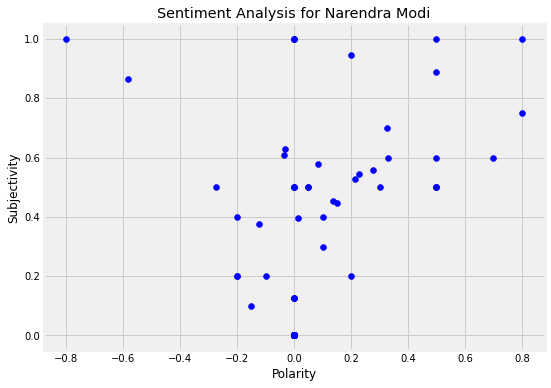

In [ ]:
#plot the polarity and subjectivity

plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
  plt.scatter(df['Polarity'][i],df['Subjectivity'][i],color='Blue')

plt.title('Sentiment Analysis for Narendra Modi')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [ ]:
#get the % of positive tweet
ptweets=df[df.Analysis=='Positive']
ptweets=ptweets['Tweets']

p=round((ptweets.shape[0]/df.shape[0])*100,1)
p

25.0

In [ ]:
#get the % of negative tweet
ntweets=df[df.Analysis=='Negative']
ntweets=ntweets['Tweets']
n=round((ntweets.shape[0]/df.shape[0])*100,1)
n

11.0

In [ ]:
#get the % of neutral tweet
ztweets=df[df.Analysis=='Neutral']
ztweets=ztweets['Tweets']
z=round((ztweets.shape[0]/df.shape[0])*100,1)
z

64.0

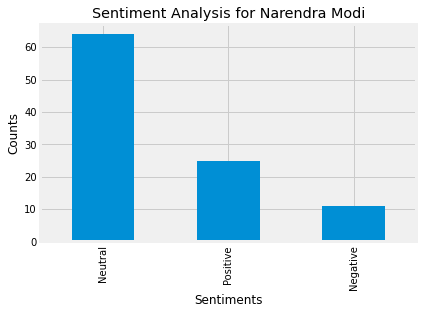

In [ ]:
#show the value counts
df['Analysis'].value_counts()

plt.title('Sentiment Analysis for Narendra Modi')
plt.xlabel('Sentiments')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()

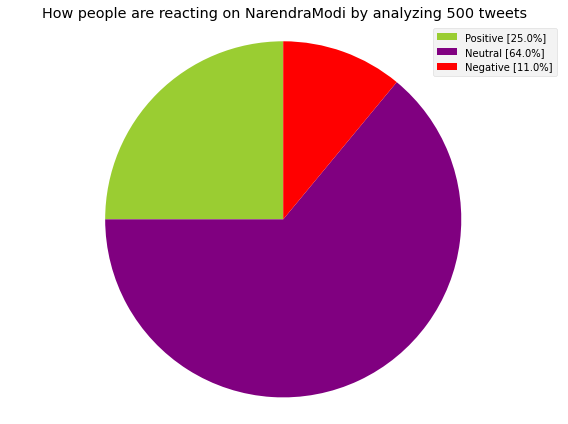

In [ ]:
plt.figure(figsize=(8,6))

Labels= ['Positive ['+str(p)+'%]', 'Neutral ['+str(z)+'%]', 'Negative ['+str(n)+'%]']
sizes= [p, z, n]
colors= ['yellowgreen','purple','red']
patches, texts=plt.pie(sizes, colors=colors,startangle=90)
plt.legend(patches,Labels,loc="best",)
plt.title("How people are reacting on " +searchTerms+ " by analyzing "+str(noOfTweet)+" tweets")
plt.axis('equal')
plt.tight_layout()  
plt.show()